In [18]:
from MTM import MTSystem
from mkutils import create_fig
import numpy as np

In [19]:
systems = []
m = 12
concs = [0.15, 0.05, 0.005] 
for conc in concs:
    systems.append(MTSystem(m=m, surfactant_concentration=conc))



/Users/matthias/CODE/MT_micellization/MTM/micelles/bilayer_vesicle.py:80: UserWarning: Error in Optimisation of micelle dimension: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:241: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:208: RuntimeWarning: overflow encountered in d

[4.30430465e-10 7.19487884e-14] [1. 2.]


/Users/matthias/CODE/MT_micellization/MTM/micelles/bilayer_vesicle.py:80: UserWarning: Error in Optimisation of micelle dimension: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:241: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:208: RuntimeWarning: overflow encountered in d

[4.29467928e-10 7.16273617e-14] [1. 2.]


/Users/matthias/CODE/MT_micellization/MTM/micelles/bilayer_vesicle.py:80: UserWarning: Error in Optimisation of micelle dimension: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:241: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:208: RuntimeWarning: overflow encountered in d

[4.27160383e-10 7.08597174e-14] [1. 2.]


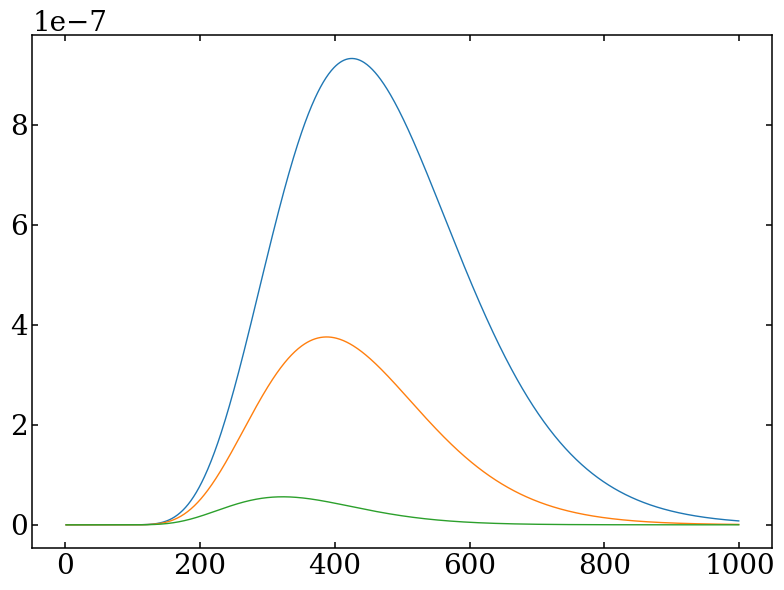

In [20]:
fig, ax = create_fig(1, 1)
ax = ax[0]
n=1000
sizes = np.linspace(1,n,n)
for system in systems:
    distrib = system.get_aggregate_distribution()
    print(distrib[0:2], sizes[:2])
    ax.plot(sizes[1:-1], distrib[1:])

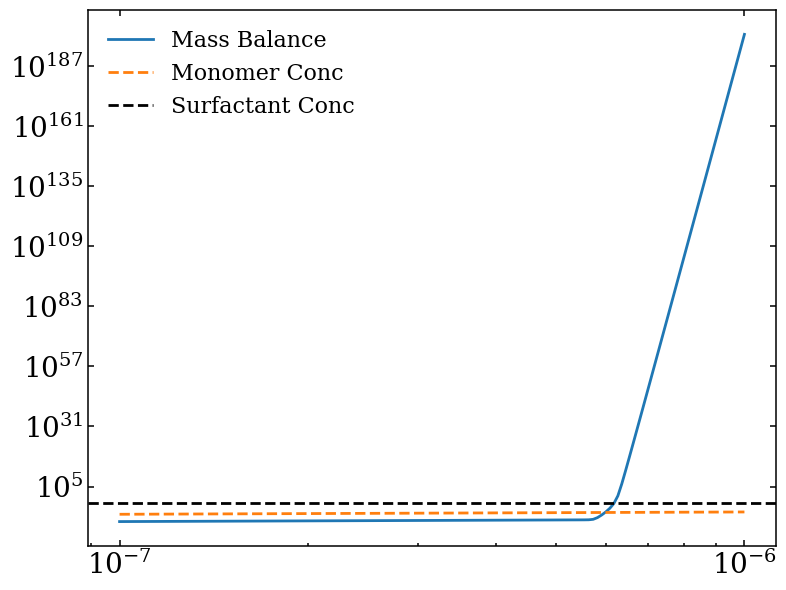

In [21]:
fig, ax = create_fig(1, 1)
ax = ax[0]

ax.set_yscale('log')
ax.set_xscale('log')

x = np.linspace(1e-7, 1e-6, 100)

ax.plot(x, [systems[2].mass_balance(xi) for xi in x], lw=2, label='Mass Balance')
ax.plot(x,x, lw=2, ls='--', label='Monomer Conc')
ax.axhline(systems[2].surfactant_concentration, label='Surfactant Conc', lw=2, ls='--', color='k')
ax.legend()


1e-07


/Users/matthias/CODE/MT_micellization/MTM/micelles/bilayer_vesicle.py:80: UserWarning: Error in Optimisation of micelle dimension: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/micelles/rodlike_micelle.py:98: UserWarning: Error in Optimisation of micelle dimension: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(errmsg)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:241: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:208: RuntimeWarning: overflow encountered in d

1.668100537200059e-07
2.782559402207126e-07
4.641588833612782e-07
7.742636826811278e-07
1.2915496650148827e-06
2.1544346900318822e-06
3.5938136638046257e-06
5.994842503189409e-06
1e-05
105.39721617610851
129.32340399051523
150.93176927240037
169.25678166571723
184.33400548190664
196.74851184993457
207.2503346975923
216.51195161280418
225.06852588443056
233.30087041629875


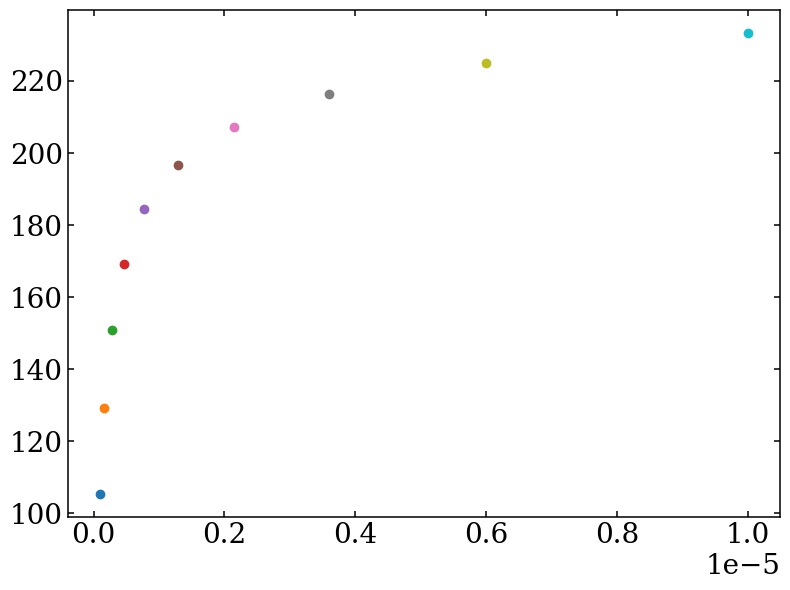

In [22]:
fig, ax = create_fig(1,1)
ax = ax[0]
concs = np.logspace(-7, -5, 10) 
systems=[]
for conc in concs:
    print(conc)
    systems.append(MTSystem(m=m, surfactant_concentration=conc))
    _ = systems[-1].get_aggregate_distribution()

for system in systems:
    gn = sum([(i+1)*item for i, item in enumerate(system.aggregate_distribution)])
    gn /= sum(system.aggregate_distribution)
    print(gn)
    ax.plot(system.surfactant_concentration, gn, marker='o')

In [23]:
system = MTSystem(m=8, surfactant_concentration=0.000425)
minimas = system.get_free_energy_minimas()


/Users/matthias/CODE/MT_micellization/MTM/micelles/_rodlike_derivative.py:352: RuntimeWarning: invalid value encountered in log
  -d_g_i_dri * np.log(1.0 - headgroup_area / area_i) + g_i * deriv
/Users/matthias/CODE/MT_micellization/MTM/micelles/_rodlike_derivative.py:369: RuntimeWarning: invalid value encountered in log
  -d_g_i_dri * np.log(1.0 - headgroup_area / area_i) + g_i * deriv


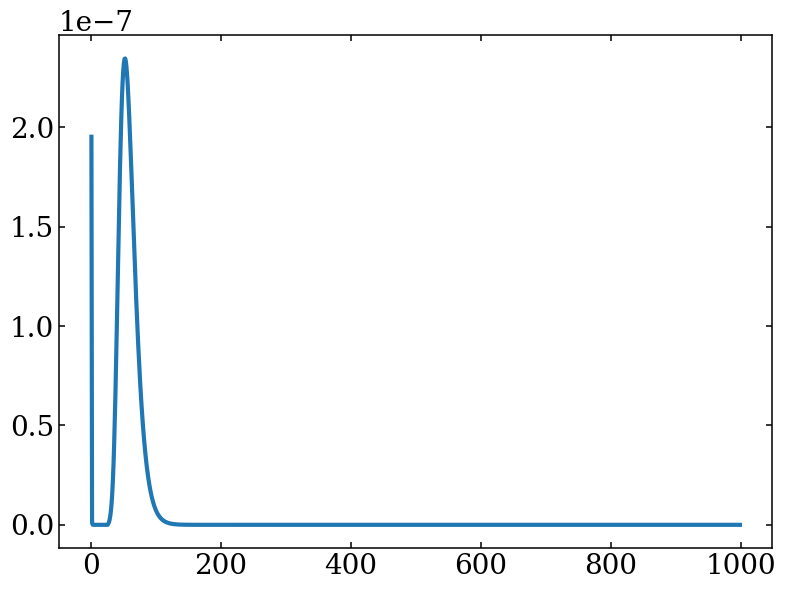

In [24]:
fig, ax = create_fig(1, 1)
ax = ax[0]

distrib = system.get_aggregate_distribution()
ax.plot(np.arange(start=1, stop=len(minimas)+1), distrib, lw=3)
dx = 1e-5


/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:241: RuntimeWarning: overflow encountered in exp
  this_value = np.exp(g * (1.0 + np.log(monomer_conc) - mu_min) - 1.0)
/Users/matthias/CODE/MT_micellization/MTM/mt_system.py:208: RuntimeWarning: overflow encountered in double_scalars
  lambda x: (x[0] + 1) * x[1],


[ 6.9005035   2.31963936  0.13966165 -1.20834445 -2.14756265]
[1.95334165e-07 9.87959037e-10 3.54415350e-11 3.56868292e-12
 6.89755208e-13]


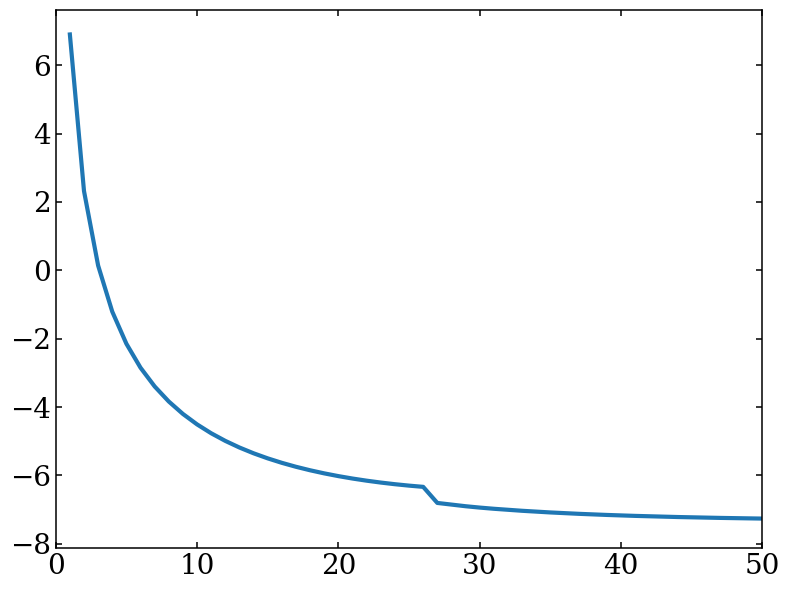

In [27]:
fig, ax = create_fig(1, 1)
ax = ax[0]

distrib = system.get_aggregate_distribution()
ax.plot(np.arange(start=1, stop=len(minimas)+1), minimas, lw=3)
ax.set_xlim(0, 50)
print(minimas[:5])
print(distrib[:5])
